In [1]:
## 9. 서울시 범죄현황에 대한 지도 시각화
#

In [3]:
import pandas as pd
import folium
import json


In [4]:
crime_anal_norm = pd.read_csv("../data/02. crime_in_Seoul_final.csv", index_col=0, encoding="utf-8")
geo_path = "../data/02. skorea_municipalities_geo_simple.json" #우리나라 경계선에 맞게 그리기
geo_str = json.load(open(geo_path, encoding="utf-8"))

In [5]:
crime_anal_norm.tail(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
중구,0.383721,0.205128,0.230769,0.599387,0.555972,74.747475,87.5,100.0,42.511628,89.707865,134593,1023,0.394995,78.893394
중랑구,0.317829,0.358974,0.615385,0.471425,0.790605,91.463415,100.0,87.5,62.211709,85.714286,412780,916,0.510844,85.377882


In [31]:
# 살인발생 건수 지도 시각화
my_map = folium.Map(
    location=[37.5, 127],
    zoom_start =13,
    tiles = "Stamen Terrain"
)# 밑바탕 지도 생성

folium.Choropleth( #코로폴리스
    geo_data=geo_str, #우리나라 경계선 좌표값이 담긴 데이터
    data = crime_anal_norm["살인"],
    columns = [crime_anal_norm.index, crime_anal_norm["살인"]],
    key_on = "feature.id",
    ###
    fill_color = "PuRd",
    fill_opacity= 0.7,
    line_opacity= 0.2,
    legend_name = "정규화된 살인 발생 건수"
).add_to(my_map)


In [25]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.384615,1.000000,1.000000,80.038760,100.000000,100.000000,53.470867,88.130935,561052,3238,0.876923,84.328112
강동구,0.310078,0.358974,0.307692,0.488988,0.632184,95.000000,92.857143,100.000000,51.425314,86.996047,440359,1010,0.419583,85.255701
강북구,0.420543,0.128205,0.538462,0.340675,0.694153,73.271889,80.000000,85.714286,54.991817,89.344852,328002,831,0.424407,76.664569
강서구,0.532946,0.256410,0.692308,0.544187,0.800600,86.909091,100.000000,100.000000,54.815574,86.392010,608255,911,0.565290,85.623335
관악구,0.624031,0.307692,0.461538,0.586284,0.808346,81.987578,83.333333,100.000000,44.555397,83.678516,520929,2109,0.557578,78.710965


In [37]:
#5대 건수(범죄) 지도 시각화
my_map2 = folium.Map(
    location = [37.5, 127],
    zoom_start = 11,
    tiles = "Stamen Terrain"
)

folium.Choropleth(
    geo_data= geo_str,
    data = crime_anal_norm["범죄"],
    columns = [crime_anal_norm.index,crime_anal_norm["범죄"]],
    key_on= "feature.id",
    fill_opacity= 0.7,
    line_opacity= 0.3,
    fill_color = "RdPu",
    legend_name= " 정규화된 5대 범죄 건수 지도 시각화"
).add_to(my_map2)



In [40]:
#인구 대비 범죄 발생건수

tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수']

my_map3 = folium.Map(
    location = [37.5, 127],
    zoom_start = 11,
    tiles = "Stamen Terrain"
)

folium.Choropleth(
    geo_data= geo_str,
    data = tmp_criminal,
    columns = [crime_anal_norm.index,tmp_criminal],
    key_on= "feature.id",
    fill_opacity= 0.7,
    line_opacity= 0.3,
    fill_color = "RdPu",
    legend_name= " 인구대비 5대 범죄 건수 지도 시각화"
).add_to(my_map3)


In [45]:
# 경찰서별 정보를 범죄발생과 함께 정리
crime_anal_station = pd.read_csv("../data/02. crime_in_Seoul_raw.csv", encoding="utf-8")
crime_anal_station.tail(2)

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
29,중부,96.0,141.0,3.0,3.0,2.0,2.0,485.0,1204.0,1164.0,1335.0,중구,37.563646,126.989580
30,혜화,64.0,101.0,6.0,6.0,2.0,2.0,379.0,988.0,842.0,972.0,종로구,37.571853,126.998914


In [51]:
import numpy as np

col = ["살인검거","강도검거","강간검거","절도검거","폭력검거"]
tmp = crime_anal_station[col] / criminal_anal_station[col].max() # 정규화 0 - 1
tmp.head()


,살인검거,강도검거,강간검거,절도검거,폭력검거
0,0.230769,1.000000,0.840625,1.000000,0.697040
1,0.384615,0.500000,0.475000,0.798937,0.731959
2,0.461538,0.153846,0.496875,0.595217,0.825407
3,0.769231,0.384615,0.746875,0.947741,0.920519
4,0.538462,0.384615,0.825000,0.829938,0.900233


In [52]:
crime_anal_station['검거'] = np.mean(tmp, axis=1) #axis = 1 은 numpy에서는 가로  ##pandas에서는 세로가 axis = 1
crime_anal_station.head()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng,검거
0,강남,269.0,339.0,26.0,24.0,3.0,3.0,1129.0,2438.0,2096.0,2336.0,강남구,37.509435,127.066958,0.753687
1,강동,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,강동구,37.528511,127.126822,0.578102
2,강북,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,강북구,37.637304,127.027340,0.506577
3,강서,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,강서구,37.551246,126.849963,0.753796
4,관악,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,관악구,37.474395,126.951349,0.695650


In [80]:
# 경찰서 위치 마커 표시
# 검거에 값을 곱한 뒤 원의 넓이 circle
my_map4 = folium.Map(
    location = [37.5,126.98], zoom_start=13, tiles="Stamen Watercolor"
)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_anal_norm["범죄"],
    columns= [crime_anal_norm.index, crime_anal_norm["범죄"]],
    key_on= "feature.id",
    fill_color="RdPu",
    line_opacity= 1,
    fill_opacity= 0.8, 
).add_to(my_map4)

for idx,rows in crime_anal_station.iterrows():
    folium.Marker(
        location= [crime_anal_station.loc[idx,"lat"],crime_anal_station.loc[idx,"lng"]],
        #location = [row["lat"],row["lng"]]
        popup = crime_anal_station.loc[idx,"구분"],        
    ).add_to(my_map4)

    folium.CircleMarker(
        location= [rows["lat"],rows["lng"]],
        radius = rows["검거"]*70,
        popup = rows["구분"] + " : " + "%.2f"%rows["검거"],
        color = "black",
        fill = True,
        fill_color = "#3186cc"
    ).add_to(my_map4)

my_map4

In [81]:
# 서울시 범죄 현황 발생 장소 분석
## 추가 검증
crime_loc_raw = pd.read_csv("../data/02. crime_in_Seoul_location.csv", thousands=",", encoding="euc-kr")
crime_loc_raw.tail(3)

,범죄명,장소,발생건수
62,폭력,학교,203
63,폭력,금융기관,42
64,폭력,기타,26382


In [82]:
crime_loc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄명     65 non-null     object
 1   장소      65 non-null     object
 2   발생건수    65 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [83]:
crime_loc_raw.범죄명.unique()

array(['살인', '강도', '강간.추행', '절도', '폭력'], dtype=object)

In [84]:
crime_loc_raw["장소"].unique()

array(['아파트, 연립 다세대', '단독주택', '노상', '상점', '숙박업소, 목욕탕', '유흥 접객업소', '사무실',
       '역, 대합실', '교통수단', '유원지 ', '학교', '금융기관', '기타'], dtype=object)

In [86]:
crime_loc = crime_loc_raw.pivot_table(
    index = "장소",
    columns = "범죄명",
    aggfunc= [np.sum]
)
crime_loc

sum                      
             발생건수                      
범죄명         강간.추행  강도  살인     절도     폭력
장소                                     
교통수단          691   0   0    457    222
금융기관            2   1   1   1081     42
기타           2128  67  65  21734  26382
노상            986  87  22   9329  24535
단독주택          395  15  30   2241   3579
사무실           132   8   1    682   1229
상점             95  34   1   4403    852
숙박업소, 목욕탕     389   9   4    828    303
아파트, 연립 다세대   284  18  12   1504   2839
역, 대합실        181   0   0    356    272
유원지            59   2   2    367    424
유흥 접객업소       398  13   8   2035   2645
학교             33   0   0    400    203

In [87]:
crime_loc.columns = crime_loc.columns.droplevel([0,1])
crime_loc

범죄명,강간.추행,강도,살인,절도,폭력
장소,,,,,
교통수단,691,0,0,457,222
금융기관,2,1,1,1081,42
기타,2128,67,65,21734,26382
노상,986,87,22,9329,24535
단독주택,395,15,30,2241,3579
사무실,132,8,1,682,1229
상점,95,34,1,4403,852
"숙박업소, 목욕탕",389,9,4,828,303
"아파트, 연립 다세대",284,18,12,1504,2839


In [91]:
col = ["강간.추행","강도","살인","절도","폭력"]
crime_loc_norm = crime_loc / crime_loc.max() #정규화
crime_loc_norm["종합"] = np.mean(crime_loc_norm, axis = 1)
crime_loc_norm

범죄명,강간.추행,강도,살인,절도,폭력,종합
장소,,,,,,
교통수단,0.324718,0.000000,0.000000,0.021027,0.008415,0.070832
금융기관,0.000940,0.011494,0.015385,0.049738,0.001592,0.015830
기타,1.000000,0.770115,1.000000,1.000000,1.000000,0.954023
노상,0.463346,1.000000,0.338462,0.429235,0.929990,0.632207
단독주택,0.185620,0.172414,0.461538,0.103110,0.135661,0.211669
사무실,0.062030,0.091954,0.015385,0.031379,0.046585,0.049467
상점,0.044643,0.390805,0.015385,0.202586,0.032295,0.137143
"숙박업소, 목욕탕",0.182801,0.103448,0.061538,0.038097,0.011485,0.079474
"아파트, 연립 다세대",0.133459,0.206897,0.184615,0.069200,0.107611,0.140356


In [94]:
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Malgun Gothic")
#get_ipython().run("matplotlib","inline")

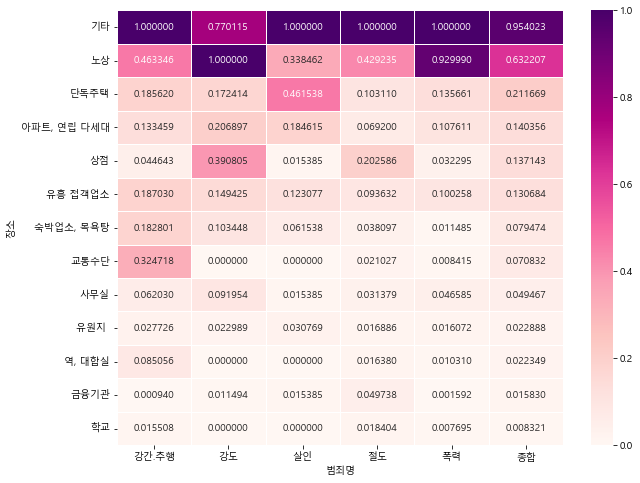

In [95]:
import seaborn as sns

crime_loc_norm_sort = crime_loc_norm.sort_values("종합", ascending=False) #내림차순

def drawGraph():
    plt.figure(figsize=(10,8)),
    sns.heatmap(
        crime_loc_norm_sort,
        annot = True,
        fmt = "f",
        linewidths= 1 ,
        cmap = "RdPu"
    )
    plt.title = "범죄 발생 장소"
    plt.show()
drawGraph()